# Define the problem

**Process Management Problem**

In the process management problem, we are given a set of tasks represented by processes $p$. Each process $p_i$ has an associated value $v_i$​ (indicating its importance) and a duration $d_i$​ (representing the time required to execute the task). Additionally, there exists a maximum allowed duration $d_{max}$​ within which we must execute these tasks.


Our objective is to select a subset $S$ of processes from $p$ such that their total duration does not exceed $d_{max}$​, while maximizing the overall value of the executed processes. In other words, we aim to find the set S that maximizes the expression:

$$\sum_{i\in S} v_i$$

subject to the constraint:

$$\sum_{i\in S} d_i \leq d_{max}$$

## Define problem instance

In [26]:
import random 


random.seed(13)

# Define the number of items
n_items = 6

# Define ranges
duration_range = [1, 7]
values_range = [5, 15]
max_duration_percentage = 0.7

# Fill the weights and values 
duration = [random.randint(duration_range[0], duration_range[1]) for _ in range(n_items)]
values  = [random.randint(values_range[0], values_range[1]) for _ in range(n_items)]

# Compute the maximum allowed weight
max_duration = int(max_duration_percentage * sum(duration))

# Print the instance
print("-" * 20)
print("Instance Details:")
print("-" * 20)
print(f"Duration                 : {duration}")
print(f"Values                   : {values}")
print(f"Total duration           : {sum(duration)}")
print(f"Maximum allowed duration : {max_duration}")

--------------------
Instance Details:
--------------------
Duration                 : [3, 3, 6, 6, 7, 7]
Values                   : [7, 15, 8, 15, 7, 8]
Total duration           : 32
Maximum allowed duration : 22


Reference Solution (Selected Processes are **Bolded**):

Duration: [3, **3**, **6**, **6**, 7, **7**]

Values: [7, **15**, **8**, **15**, 7, **8**]

Total selected Duration: 22

Total selected values: 46

# Hackathon Tasks 


## Problem 1

### Build the cost hamiltonians for the Process Management problem:

In [53]:
import numpy as np

# Reformulate constraint as an equality by introducting x such that:
# C = \sum_{i \in S} v_i
# subject to \sum_{i \in S} d_i + x = d_max

# Number of ancillas to represent 0 <= x <= d_max
n_ancillas = int(np.ceil( np.log2(max_duration) ))

binary_decomp = [2**i for i in range(n_ancillas)]

print(n_ancillas)

5


In [57]:
from qibo.symbols import Z, X
from qibo.hamiltonians import SymbolicHamiltonian

def build_cost_hamiltonian(values: list[int], duration: list[int], max_duration: int) -> SymbolicHamiltonian:
    """This function should be filled to build the problem cost hamiltonian.

    Args:
        values (list[int]): the list of values.
        duration (list[int]): the list of durations. 
        max_duration (int): the maximum value of the allowed duration.
        
    """

    
    
    
    cost_hamiltonian = - sum([values[i] * (1-Z(i))/2 for i in range(len(values))]) +\
                        ( sum([ duration[i]*(1-Z(i))/2 for i in range(len(duration))])+ sum([ binary_decomp[j] * (1-Z(j+6))/2 for j in range(n_ancillas)]) - max_duration   )**2 \

    # cost_hamiltonian = - sum([values[i] * (1-Z(i))/2 for i in range(len(values))]) 
    # cost_hamiltonian = sum( [ - values[i]/duration[i] * (1-Z(i))/2 for i in range(len(duration)) ])
    # cost_hamiltonian = -(1 - (sum([duration[i]*(1-Z(i))/2 for i in range(len(duration))]))/max_duration) *\
    #     sum([(values[i])*(1-Z(i))/2 for i in range(len(duration))])
    
    return SymbolicHamiltonian(cost_hamiltonian)

### Compute the number fo qubits required to execute the cost hamiltonian

In [58]:
# define the number of qubits:

nqubits = 6 + n_ancillas # 6 task qubits + n_ancillas ancillas

### Diagonalize the cost hamiltonian and examen its eigenvalues and eigenvectors. 
- Show that the ground state eigenvector does actually correspond to the ground state energy of the problem. (Note: the ground state could be degenerate)

In [60]:
import numpy as np
from qibo import set_backend

# set the backend used for the calculation 
set_backend("numpy", platform=None)


# create the cost Hamiltonian for the given graph
cost_hamiltonian = build_cost_hamiltonian(values=values, duration=duration, max_duration=max_duration)

ham_matrix = cost_hamiltonian.matrix

eig_val, eig_vec = np.linalg.eig(ham_matrix)
eig_vec = ["{0:0{bits}b}".format(i.argmax(), bits=nqubits) for i in eig_vec]

vec = zip(eig_val, eig_vec)
diagonalized_solution = sorted(vec, key=lambda x: x[0])

print()
#print(diagonalized_solution)

for sol in diagonalized_solution:
    dur_sol = sum([duration[i] for i in range(len(duration)) if sol[1][i]=="1"])
    val_sol = sum([values[i] for i in range(len(values)) if sol[1][i]=="1"])

    if dur_sol > max_duration:
        print("\033[93m",end="")
    else:
        print("\033[0m",end="")
    print(f"{sol[1]}, {sol[0]}:.02f, value = {val_sol}, duration = {dur_sol}")
    

[Qibo 0.2.7|INFO|2024-05-04 19:32:58]: Using numpy backend on /CPU:0
[Qibo 0.2.7|WARNING|2024-05-04 19:32:58]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.



01110100000, (-46+0j):.02f, value = 46, duration = 22
01110110000, (-45+0j):.02f, value = 46, duration = 22
01111000000, (-45+0j):.02f, value = 45, duration = 22
11010111000, (-45+0j):.02f, value = 45, duration = 19
11110000100, (-45+0j):.02f, value = 45, duration = 18
01011100000, (-44+0j):.02f, value = 45, duration = 23
01111010000, (-44+0j):.02f, value = 45, duration = 22
11010100100, (-44+0j):.02f, value = 45, duration = 19
11010101000, (-44+0j):.02f, value = 45, duration = 19
11011011000, (-44+0j):.02f, value = 44, duration = 19
11110010100, (-44+0j):.02f, value = 45, duration = 18
11110011000, (-44+0j):.02f, value = 45, duration = 18
11110100000, (-44+0j):.02f, value = 53, duration = 25
11011000100, (-43+0j):.02f, value = 44, duration = 19
11011001000, (-43+0j):.02f, value = 44, duration = 19
11111000000, (-43+0j):.02f, value = 52, duration = 25
01110101000, (-42+0j):.02f, value = 46, duration = 22
01011110000, (-41+0j):.02f, value = 45, duration = 23
01111001000, (-41+0j):.02f,

## Problem 2

### Given that we only have **6 qubits** to solve this problem. Reduce the hamiltonian to use **only 6 qubits**.

In [104]:
nqubits = 6

def build_cost_hamiltonian(values: list[int], duration: list[int], max_duration: int) -> SymbolicHamiltonian:
    """This function should be filled to build the problem cost hamiltonian.

    Args:
        values (list[int]): the list of values.
        duration (list[int]): the list of durations. 
        max_duration (int): the maximum value of the allowed duration.
        
    """

    # cost_hamiltonian = - sum([values[i] * (1-Z(i))/2 for i in range(len(values))]) + sum([duration[i] * (1-Z(i))/2 for i in range(len(duration))])
    a = ( sum([duration[i] * (1-Z(i))/2 for i in range(len(duration))]) )/max_duration - 1
    b = sum([values[i] * (1-Z(i))/2 for i in range(len(values))])
    cost_hamiltonian = np.log(2) + a/2 + (a**2)/8 - b
 
    return SymbolicHamiltonian(cost_hamiltonian)

### Solve this hamiltonian using the QAOA algorithm. 

        step 1. Define the Mixing hamiltonian.

In [106]:
def build_mixer_hamiltonian(nqubits: int) -> SymbolicHamiltonian:
    '''
    build the mixer hamiltonian for the given graph.

    args:
        graph: graph
            A network graph

    returns:
        The mixer hamiltonian of the given graph

    '''
    mixing_hamiltonian = sum([ X(i) for i in range(nqubits)]) # TODO: define the Mixing Hamiltonian 
    
    return SymbolicHamiltonian(mixing_hamiltonian)

        Step 2. Run the QAOA algorithm.

In [107]:
from qibo import models

hamiltonian = build_cost_hamiltonian(values=values, duration=duration, max_duration=max_duration)
mixer_hamiltonian = build_mixer_hamiltonian(nqubits)

# create QAOA model given the Hamiltonians
qaoa = models.QAOA(hamiltonian=hamiltonian, mixer=mixer_hamiltonian)

# optimize using random initial variational parameters with four layers 
n_layers = 5
# initial_parameters = 0.01 * np.random.random(n_layers * 2)
initial_parameters =  0.01 *  (2 * np.random.random(n_layers * 2) - 1) * np.pi
print(initial_parameters)

# run the QAOA optimization with the initial parameters and the hamiltonians defined 

# Define random initial variational parameters with four layers 
n_layers = 4
initial_parameters = 0.01 * np.random.random(n_layers * 2)


"""
supported optimization Method: 
- Nelder-Mead 
- parallel_L-BFGS-B
- Powell
- CG
- cma
- sgd
- L-BFGS-B
- Newton-CG
- COBYLA
- BFGS
- trust-constr
"""
method = "Powell"


best_energy, final_parameters, _ = qaoa.minimize(initial_parameters, method=method)

print("best energy: ", best_energy)

[-0.0208712   0.00541327 -0.03120395  0.01161014  0.01838732 -0.02632555
  0.00080511  0.00138794  0.01387254  0.02977555]
best energy:  -3.0404655745550606


    Step 3. Display solution and compare it to the ground state you obtained in problem 1

In [109]:
qaoa.set_parameters(final_parameters)
quantum_state = qaoa.execute(None)

probabilities = (np.abs(quantum_state) ** 2)
probabilities = zip(probabilities, [i for i in range(len(probabilities))])
probabilities = sorted(probabilities, key=lambda x: x[0], reverse=True)
probabilities = [("{:.2f} %".format(round(p*100, 4)), "{0:0{bits}b}".format(s, bits=nqubits)) for p, s in probabilities]
print(probabilities)
qaoa_solution = probabilities[0][1]
print("-"*10)

print("The best solution is:", qaoa_solution )

[('97.21 %', '111111'), ('1.80 %', '111101'), ('0.43 %', '111011'), ('0.23 %', '101111'), ('0.11 %', '011111'), ('0.06 %', '110111'), ('0.04 %', '111001'), ('0.03 %', '111010'), ('0.02 %', '110011'), ('0.02 %', '111110'), ('0.01 %', '101101'), ('0.01 %', '101110'), ('0.01 %', '100111'), ('0.01 %', '101011'), ('0.01 %', '110101'), ('0.00 %', '011101'), ('0.00 %', '001111'), ('0.00 %', '011011'), ('0.00 %', '110110'), ('0.00 %', '111100'), ('0.00 %', '011110'), ('0.00 %', '111000'), ('0.00 %', '110100'), ('0.00 %', '101001'), ('0.00 %', '010111'), ('0.00 %', '110010'), ('0.00 %', '101100'), ('0.00 %', '100101'), ('0.00 %', '010011'), ('0.00 %', '011010'), ('0.00 %', '110001'), ('0.00 %', '001101'), ('0.00 %', '100110'), ('0.00 %', '101010'), ('0.00 %', '000111'), ('0.00 %', '011100'), ('0.00 %', '011001'), ('0.00 %', '001110'), ('0.00 %', '010101'), ('0.00 %', '110000'), ('0.00 %', '101000'), ('0.00 %', '100010'), ('0.00 %', '100001'), ('0.00 %', '010110'), ('0.00 %', '100011'), ('0.00 %

### Solve this hamiltonian using Quantum Adiabatic Evolution

        Setp 1. Define initial hamiltonian

In [10]:
def build_initial_hamiltonian(nqubits: int) -> SymbolicHamiltonian:
    '''
    build the mixer hamiltonian for the given graph.

    args:
        graph: graph
            A network graph

    returns:
        The mixer hamiltonian of the given graph

    '''
    mixing_hamiltonian = sum([X(i) for i in range(nqubits)]) # TODO: define the Mixing Hamiltonian 
    
    return SymbolicHamiltonian(mixing_hamiltonian)

    Step 2. Run the Adiabatic Evolution

In [11]:
import numpy as np
from qibo.models.evolution import AdiabaticEvolution
from qibo.hamiltonians.hamiltonians import Hamiltonian


# build initial (H0) and target (H1) hamiltonians
H0 = build_initial_hamiltonian(nqubits=nqubits)
H1 = build_cost_hamiltonian(values=values, duration=duration, max_duration=max_duration)

# calculate the dense hamiltonian from the symbolic hamiltonian
H1_dense = Hamiltonian(nqubits, H1.calculate_dense().matrix)
H0_dense = Hamiltonian(nqubits, H0.calculate_dense().matrix)

# Define the time steps
dt = 0.1

# Define the final evolution time
T = 20

# define the schedule. This is a function of time that defines the scheduling of the adiabatic evolution. 
# Can be either a function of time s(t) or a function with two arguments s(t, p) 
# where p corresponds to a vector of parameters to be optimized.
def s(t): return t

# construct the adiabatic model
adiabatic_model = AdiabaticEvolution(H0_dense, H1_dense, s, dt)

# execute the adiabatic optimization
adiabatic_quantum_state = adiabatic_model.execute(final_time=T)

    Step 3. Display solution and compare it to the ground state you obtained in problem 1 and using QAOA

In [12]:
# obtain the state with the highest probability
solution_dec  = (np.abs(adiabatic_quantum_state) ** 2).argmax()
adiabatic_solution = "{0:0{bits}b}".format(solution_dec, bits=nqubits)


print("the solution is: ", adiabatic_solution)

the solution is:  111111


### What are the downsides to the method you used to reduce the number of qubits? 

write your answer here...

## Problem 3

### Given this new dataset generate a hamiltonian that only uses 3 qubits 

In [13]:
import random 


random.seed(13)

# Define the number of items
n_items = 3

# Define ranges
max_duration_percentage = 0.7

# Fill the weights and values 
values   = [6, 2, 6]
duration = [3, 3, 6]

# Compute the maximum allowed weight
max_duration = int(max_duration_percentage * sum(duration))



# Print the instance
print("-" * 20)
print("Instance Details:")
print("-" * 20)
print(f"Duration                 : {duration}")
print(f"Values                   : {values}")
print(f"Total duration           : {sum(duration)}")
print(f"Maximum allowed duration : {max_duration}")

--------------------
Instance Details:
--------------------
Duration                 : [3, 3, 6]
Values                   : [6, 2, 6]
Total duration           : 12
Maximum allowed duration : 8


### Design a circuit layout that is suitable for this Hamiltonian

    Step 1. Create each element of the circuit

Your qubits will have a critical current of 230nA, shunting capacitance of 50fF, Z loop capacitance of 4.4fF, inductance of 480pH, x to z loop current ration of 0.4 and junction assymetry of 0.

The coupler's parameters are given

In [14]:
import cas as cas

# coupler parameters
i_sigma = 565
c_sigma = 11
lc = 580
d = 0.0
# qubit parameters
i_c = 230
c_shunt = 50
c_z = 4.4
lq = 480
alpha = 0.4
d = 0.0

# define couplers and qubits


coupler01 = cas.Coupler(i_sigma, c_sigma, lc, d)
coupler12 = cas.Coupler(i_sigma, c_sigma, lc, d)
coupler20 = cas.Coupler(i_sigma, c_sigma, lc, d)

qubit0 = cas.CSFQ(i_c, c_shunt, c_z, lq, alpha, d)
qubit1 = cas.CSFQ(i_c, c_shunt, c_z, lq, alpha, d)
qubit2 = cas.CSFQ(i_c, c_shunt, c_z, lq, alpha, d)

circuit_elements = [qubit0, coupler01, qubit1, coupler12, qubit2, coupler20]

C:\Users\yaron\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


    Step 2. Define the qubit-coupler interaction and create the circuit object

A good approximation is to consider only the first 5 energy levels of the qubit and the first 2 energy levels of the coupler

In [15]:
m = 65; m_mat = np.zeros((6, 6)) # mutual inductance matrix (given)

m_mat[0, 1] = -m; m_mat[1, 2] = m
m_mat[2, 3] = -m; m_mat[3, 4] = m
m_mat[4, 5] = -m; m_mat[5, 0] = m

m_mat = -(m_mat + m_mat.T)

trunc_vec = np.array([5, 2, 5, 2, 5, 2]) # truncation vector for the energies of each element
circuit = cas.AnnealingCircuit(circuit_elements, m_mat, trunc_vec)

### Design an annealing Ising schedule 

    Step 1. Define the starting (initial) and objective hamiltonian coefficients

In [16]:
# initialization hamiltonian
h0 = {} # type: dict[str, np.ndarray]
# H_0 = sum([X(i) for i in range(nqubits])
h0["x_0"] = 1
h0["x_1"] = 0.9
h0["x_2"] = 0.8

h0["z_0"] = 0
h0["z_1"] = 0
h0["z_2"] = 0

h0["zz_0,1"] = 0
h0["zz_1,2"] = 0
h0["zz_2,0"] = 0

# objective hamiltonian
hf = {} # type: dict[str, np.ndarray]
# H_C = sum([ values[i] * (Z(i)-1)/2 for i in range(nqubits])
hf["x_0"] = 0
hf["x_1"] = 0
hf["x_2"] = 0

hf["z_0"] = 0.9
hf["z_1"] = 1
hf["z_2"] = 0.8

hf["zz_0,1"] = 0
hf["zz_1,2"] = 0
hf["zz_2,0"] = 0

    Step 2. Create a method to get a an arbitrary schedule for the circuit designed above

In [17]:
def get_schedule(h0: dict[str, np.ndarray], hf: dict[str, np.ndarray], points: int, schedule: callable) -> dict[str, int | np.ndarray]:
    """Given the ising coefficients for the initial and final hamiltonian of the annealing schedule,
    and given some time dependance of the schedule (eg. linear, exponential, etc), returns the ising
    coefficients for x and z at each time step.

    args:
        h0 (dict[str, np.ndarray]): ising coefficients of the starting hamiltonian h0
        hf (dict[str, np.ndarray]): ising coefficients of the target (final) hamiltonian hf
        points (int): number of points in the annealing schedule
        schedule (callable): time dependance of the schedule
    
    returns:
        dict[str, np.ndarray]: Dictionary of ising coefficients at each step of the schedule
    """

    ising_dict = {}
    s = np.linspace(0, 1, points)
    ising_dict["points"] = points
    
    ising_dict["x_0"] = schedule(h0["x_0"], hf["x_0"], points)*2*np.pi
    ising_dict["x_1"] = schedule(h0["x_1"], hf["x_1"], points)*2*np.pi
    ising_dict["x_2"] = schedule(h0["x_2"], hf["x_2"], points)*2*np.pi
    
    ising_dict["z_0"] = schedule(h0["z_0"], hf["z_0"], points)*2*np.pi
    ising_dict["z_1"] = schedule(h0["z_1"], hf["z_1"], points)*2*np.pi
    ising_dict["z_2"] = schedule(h0["z_2"], hf["z_2"], points)*2*np.pi
    
    ising_dict["zz_0,1"] = -schedule(h0["zz_0,1"], hf["zz_0,1"], points)*2*np.pi
    ising_dict["zz_1,2"] = schedule(h0["zz_1,2"], hf["zz_1,2"], points)*2*np.pi
    ising_dict["zz_0,2"] = schedule(h0["zz_2,0"], hf["zz_2,0"], points)*2*np.pi
    
    return ising_dict



    Step 2. Get the ising coefficients for a linear and an exponential schedule for a resolution of 1ns

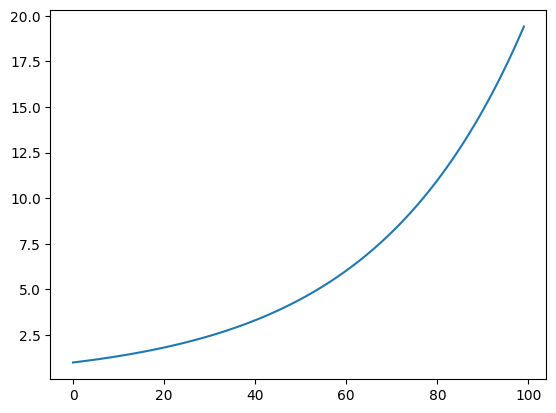

In [75]:
# linear schedule
linear_schedule = lambda xi, xf, n: np.array([xi + i * ((xf-xi)/(n-1)) for i in range(n)])
# ising_linear = get_schedule(h0, hf, points=100, schedule=linear_schedule)

# exponential schedule
exponential_schedule = lambda xi, xf, n: np.array([xi * np.exp((i*np.log(xf/(xi+1e-10)))/n) for i in range(n)])
# ising_exponential = get_schedule(h0, hf, points=10, schedule=exponential_schedule)
import matplotlib.pyplot as plt
plt.plot(exponential_schedule(1,20,100))

In [19]:
#BROUILLON
from matplotlib import pyplot as plt
N = 100
a = 0
b = 1
plt.plot(exponential_schedule(a, b, N), '.')

KeyboardInterrupt: 

    Step 3. Calculate the flux schedule for the exponential schedule

In [ ]:
def get_fluxes(ising_schedule: dict[str, int | np.ndarray], optimizer: str) ->  dict[str, int | np.ndarray]:
    """Get the flux schedule from a given ising schedule.

    Args:
        ising_schedule (dict[str, int  |  np.ndarray]): dictionary with the number of points in the schedule
            and the ising coefficients for each control of the circuit at each point of the schedule
        optimizer (str): name of the lmfit minimizer to use

    Returns:
        dict[str, int | np.ndarray]: dictionary containing the number of points in the schedule and the fluxes
            to be applied at each control of the circuit at each point of the schedule.
    """
    
    flux_dict = circuit.get_custom_fluxes_pwsw(ising_schedule, verbose=True, optimizer_method=optimizer)
    return flux_dict
    

### With the obtain fluxes calculate the energy spectrum of the circuit

    Step 1. Define a function to get the spectrum from the flux schedule using the code from CAS

In [ ]:
def get_schedule_spectrum(flux_dict: dict[str, int | np.ndarray], levels: int) -> np.ndarray:
    """Calculate the energy spectrum through the schedule. The more levels we try to calculate,
    the more computationally expensive this will be.

    Args:
        flux_dict (dict[str, int  |  np.ndarray]): dictionary containing the number of points in the schedule and the fluxes
            to be applied at each control of the circuit at each point of the schedule.
        levels (int): energy levels to compute

    Returns:
        np.ndarray: of size (schedule points, levels) with the energy gaps for each level (En - E0),
            where E0 is the ground state energy and En is the energy of level n.
    """
    energy = circuit.calculate_spectrum(flux_dict, levels) 
    return energy-np.min(energy)
    

In [ ]:
schedule_spectrum = get_schedule_spectrum(get_fluxes(ising_linear, "leastsq"), 5)

In [ ]:
schedule_spectrum

In [ ]:
for i in range(schedule_spectrum.shape[1]):
    plt.plot(schedule_spectrum[:,i])

### Research questions

1. For the annealing schedules calculated, do any of the resulting spectral schedules fulfill the adiabatic theorem?
2. By this point you will have obtained two energies, one from the software challenge (QAOA) and one from the annealing schedule above. Argue their relation.
3.  If you have made it here, you have problaly seen the difficulties of solving small instances. Can you propose ways to scale these procedures to more qubits? Some techniques for finding the gap along the annealing process can be found in [1], [2], [3] and [4]. Can you implement a simulation from one of these papers? Research and propose better techniques to find the flux schedule for a given Ising schedule with a greater amount of qubits.  

## Bibliography

[1] Adiabatic Spectroscopy and a Variational Quantum Adiabatic Algorithm: https://arxiv.org/abs/2103.01226

[2] Direct estimation of the energy gap between the ground state and excited state with quantum annealing: https://arxiv.org/abs/2007.10561

[3] Simulating quantum circuits by adiabatic computation: improved spectral gap bounds: https://arxiv.org/abs/1906.05233

[4] Spectroscopy on two coupled flux qubits: https://arxiv.org/abs/cond-mat/0308192

